<a href="https://colab.research.google.com/github/rajsecrets/pr-CIFAR10-CNN/blob/main/CIFAR10_dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing important libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# 2. Data

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_test.shape

170498071/170498071 [==============================] - 4s 0us/step


(10000, 32, 32, 3)

In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
# This pic is in array form , so we will convert in its visual form
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
# Let's check its datatype
x_train[0].dtype

dtype('uint8')

In [6]:
# How to convert it into numpy array
import numpy as np
new_array=np.array(x_train[0])
new_array

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
new_array.dtype

dtype('uint8')

Not converted !!

In [8]:
# we are using opencv to show the image
# import cv2
# import numpy as np

# # Load a uint8 image using OpenCV
# cv2.imshow(x_train[0])
# # Convert the image to a NumPy array
# numpy_array = np.array(image)

# # Check the data type of the resulting NumPy array
# print(numpy_array.dtype)



# Not working because this cv2.imshow is disabled in colab because it craashes the whole session

## Loading the images to show

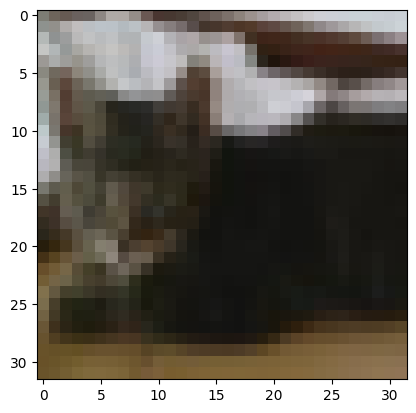

In [9]:
# Load the image and show - this is the way to show a image visually
img = plt.imshow(x_train[9])

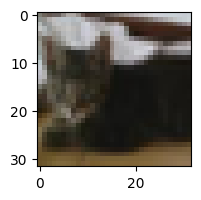

In [10]:
# Now the image is quite big so it is now looking good that's why
# we will resize this pic
plt.figure(figsize=(15,2))
plt.imshow(x_train[9])

In [11]:
# Now we want to show the label of the images
# y_train and y_test has labels in the form of 0,1,2,3,4

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
# lets reshape it
y_train =  y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
# so we will manually build the classes and labels and then index it by 0,1,2
classes=["airplane","automobile","bird","cat","deer","dog","frog","house","ship","truck"]

'airplane'

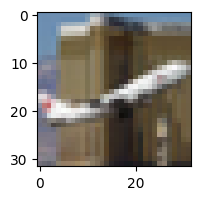

In [15]:
# This code is for showing the image and also showing the label
i = 49004
plt.figure(figsize=(8,2))
plt.imshow(x_train[i])
t = int(y_train[i])
classes[t]

In [16]:
def plot_sample(x,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

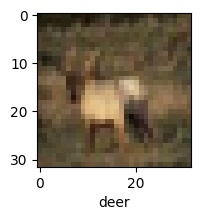

In [17]:
plot_sample(x_train,y_train,3)

## Normalise our data

In [18]:
x_train=x_train/255
x_test = x_test/255

# 3. Building a Model

In [19]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 5ms/step - loss: 1.8142 - accuracy: 0.3541
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6249 - accuracy: 0.4251
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5415 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4817 - accuracy: 0.4752
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4316 - accuracy: 0.4960


###

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.77      0.48      1000
           1       0.58      0.63      0.60      1000
           2       0.34      0.41      0.37      1000
           3       0.39      0.25      0.31      1000
           4       0.49      0.31      0.38      1000
           5       0.58      0.18      0.28      1000
           6       0.41      0.71      0.52      1000
           7       0.75      0.33      0.46      1000
           8       0.57      0.58      0.57      1000
           9       0.60      0.43      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



### Building CNN to train our images

In [27]:
cnn = models.Sequential([
    # CNN ARTITECHTURE
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    #DENSE
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### fitting the data and train , run epochs to get it train again and again

In [32]:
cnn.fit(x_train,y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6266 - accuracy: 0.7816
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5999 - accuracy: 0.7922
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5707 - accuracy: 0.8018
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5528 - accuracy: 0.8060
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5284 - accuracy: 0.8135
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5077 - accuracy: 0.8226
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4873 - accuracy: 0.8286
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4699 - accuracy: 0.8328
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4487 - accuracy: 0.8422
Epoch 10/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.43

### Evaluating the model by putting the input (x_test,y_test)

In [33]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.7429 - accuracy: 0.6712


[2.7428576946258545, 0.6711999773979187]

In [34]:
y_test[:4]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [36]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

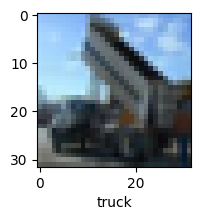

In [39]:
plot_sample(x_test,y_test,50)

In [40]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.76478772e-13, 8.35925381e-15, 2.85408835e-10, 6.61243379e-01,
        2.41347851e-04, 3.34372371e-03, 1.80412840e-09, 1.32084624e-15,
        2.57199275e-08, 3.35171491e-01],
       [1.18264126e-07, 3.99562850e-06, 1.34067312e-35, 5.35909148e-15,
        1.93921002e-30, 3.57487129e-30, 3.45554958e-24, 2.75728858e-37,
        9.99995828e-01, 1.19136306e-15],
       [1.47123227e-03, 3.82752568e-02, 3.03018956e-14, 2.70753553e-09,
        2.40466636e-13, 2.90345213e-18, 1.09804696e-20, 1.62068899e-13,
        9.60252881e-01, 5.31216585e-07],
       [9.99832392e-01, 1.00062558e-12, 3.50623762e-15, 1.00776158e-17,
        1.44612241e-14, 4.12348325e-31, 1.16698592e-20, 1.52385770e-24,
        1.67632767e-04, 2.33764198e-18],
       [2.10533868e-14, 8.09602392e-15, 2.09753140e-04, 7.59773493e-01,
        8.04038793e-02, 6.61210464e-08, 1.59612820e-01, 6.56717654e-14,
        1.86704103e-15, 1.31032156e-19]], dtype=float32)

In [49]:
# Max value from the "array"
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 3]

In [50]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

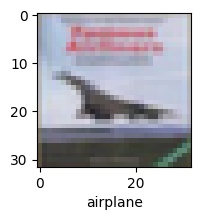

In [51]:
plot_sample(x_test, y_test, 3)

In [52]:
classes[y_classes[3]]

'airplane'

In [54]:
# Report of Precision | Recall | f1-score
# Input is y_test, y_classes
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.79      0.81      0.80      1000
           2       0.60      0.52      0.56      1000
           3       0.49      0.49      0.49      1000
           4       0.63      0.58      0.60      1000
           5       0.54      0.62      0.58      1000
           6       0.72      0.73      0.73      1000
           7       0.76      0.68      0.72      1000
           8       0.79      0.75      0.77      1000
           9       0.72      0.79      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

